In [1]:
import numpy as np
import scipy.fft as sci
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from bisect import bisect
import eddington
import pickle

size = [30,10]
path = '/mnt/c/Users/alon4/Dropbox/My PC (LAPTOP-L5MMEHHN)/Desktop/Studies/Lab C1/Molecular Spectroscopy'

def readXlsx(path):
    return pd.read_excel(path).to_numpy().T

def remove_presuffix(text, prefix, suffix):
    if text.startswith(prefix):
        text = text[len(prefix):]
    if text.endswith(suffix):
        text = text[:-len(suffix)]
    return text

files = os.listdir(os.path.join(path,'Measurements/Solids'))
solids = [readXlsx(os.path.join(path,f'Measurements/Solids/{file}')) for file in files]
files = [remove_presuffix(file,"solid ",".xlsx") for file in files]

with open(os.path.join(path, "Analysis/Solids - Plots/__optimal.txt"), 'rb') as f:
    optimal = pickle.load(f)

In [2]:
for i in range(len(solids)):
    solids[i][0] = solids[i][0][::-1]
    solids[i][1] = solids[i][1][::-1]

eq_solids_x = [np.linspace(solids[i][0][0],solids[i][0][-1], len(solids[i][0]))[:-2] for i in range(len(solids))]
eq_solids_y = [np.array([(solids[i][1][bisect(solids[i][0],x)]-solids[i][1][bisect(solids[i][0],x)-1])/\
                 (solids[i][0][bisect(solids[i][0],x)]-solids[i][0][bisect(solids[i][0],x)-1]) *
                 (x-solids[i][0][bisect(solids[i][0],x)-1]) + solids[i][1][bisect(solids[i][0],x)-1] for x in eq_solids_x[i]]) for i in range(len(solids))]

13_4 0


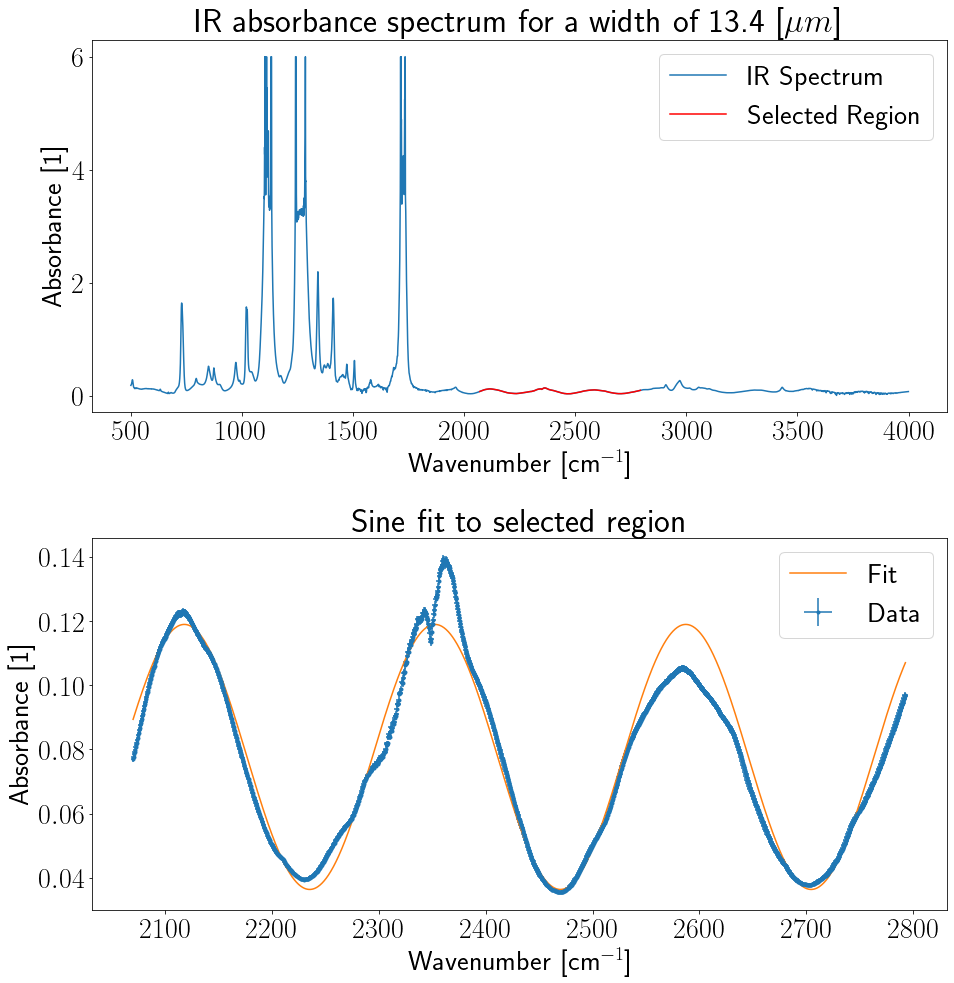

14 1


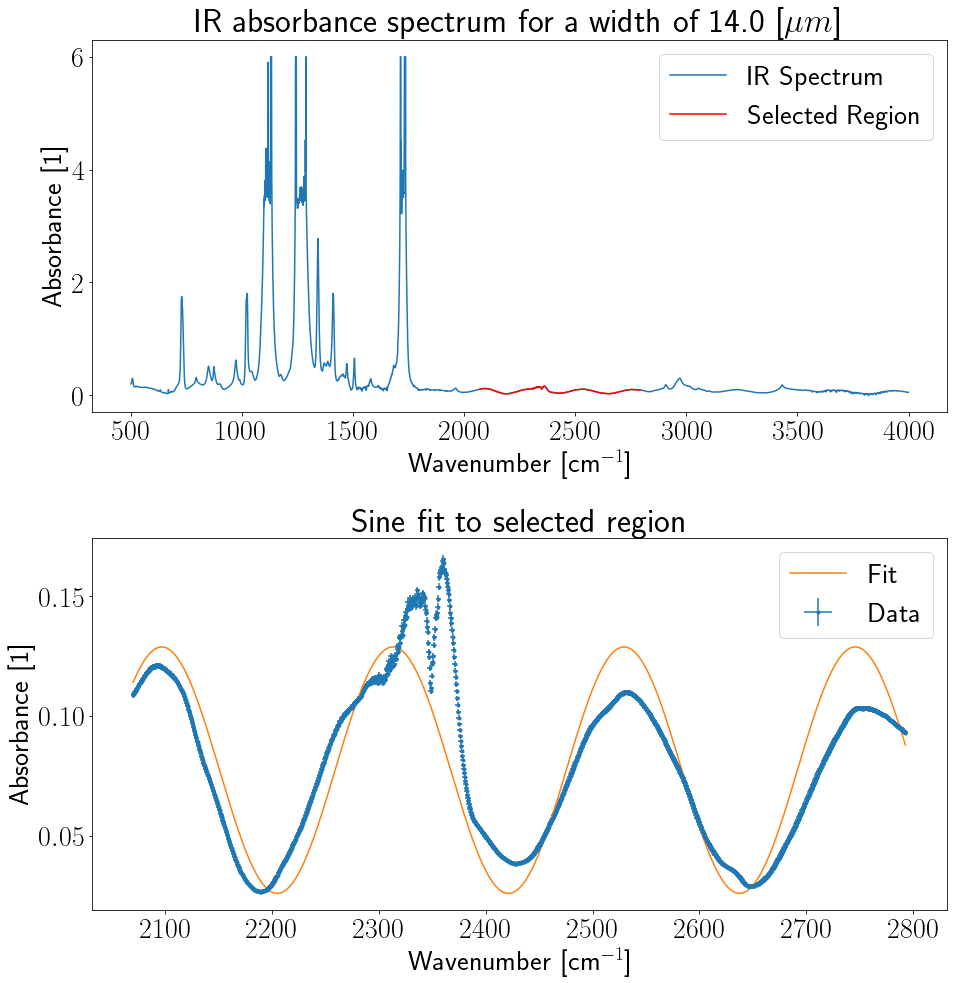

18_9 2


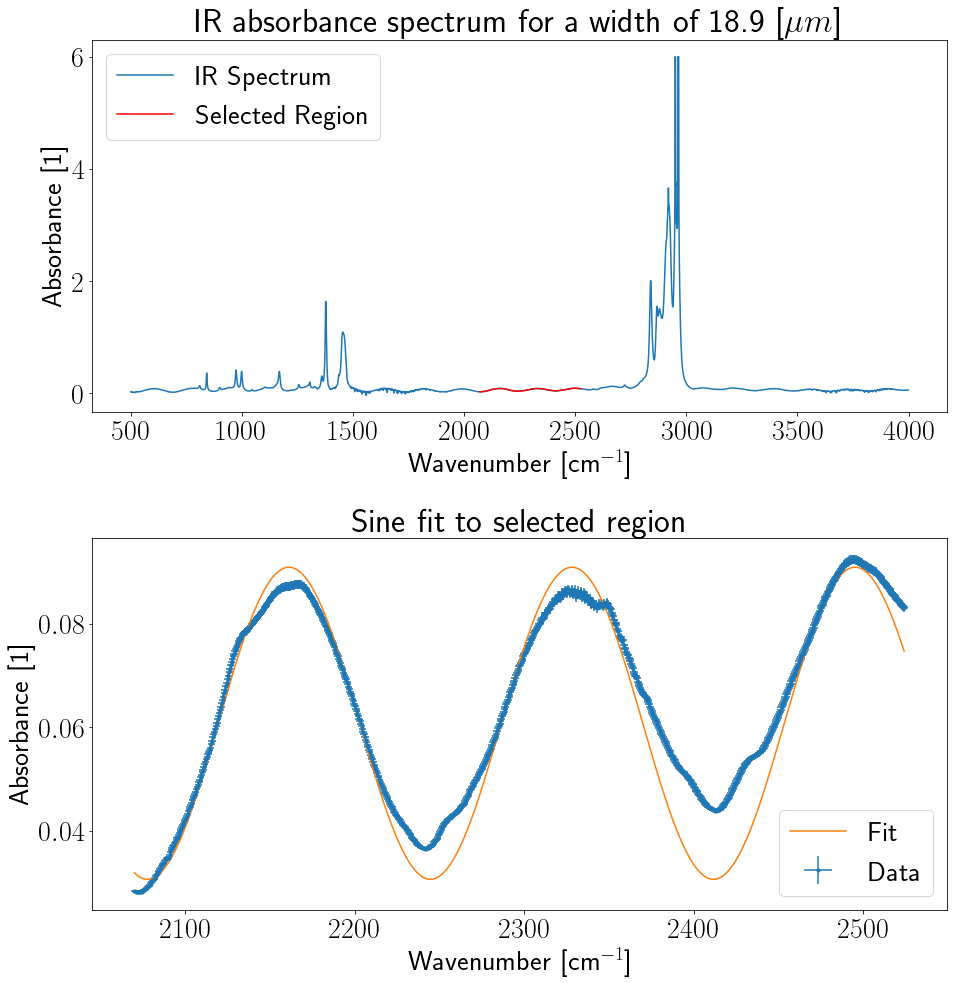

24 3


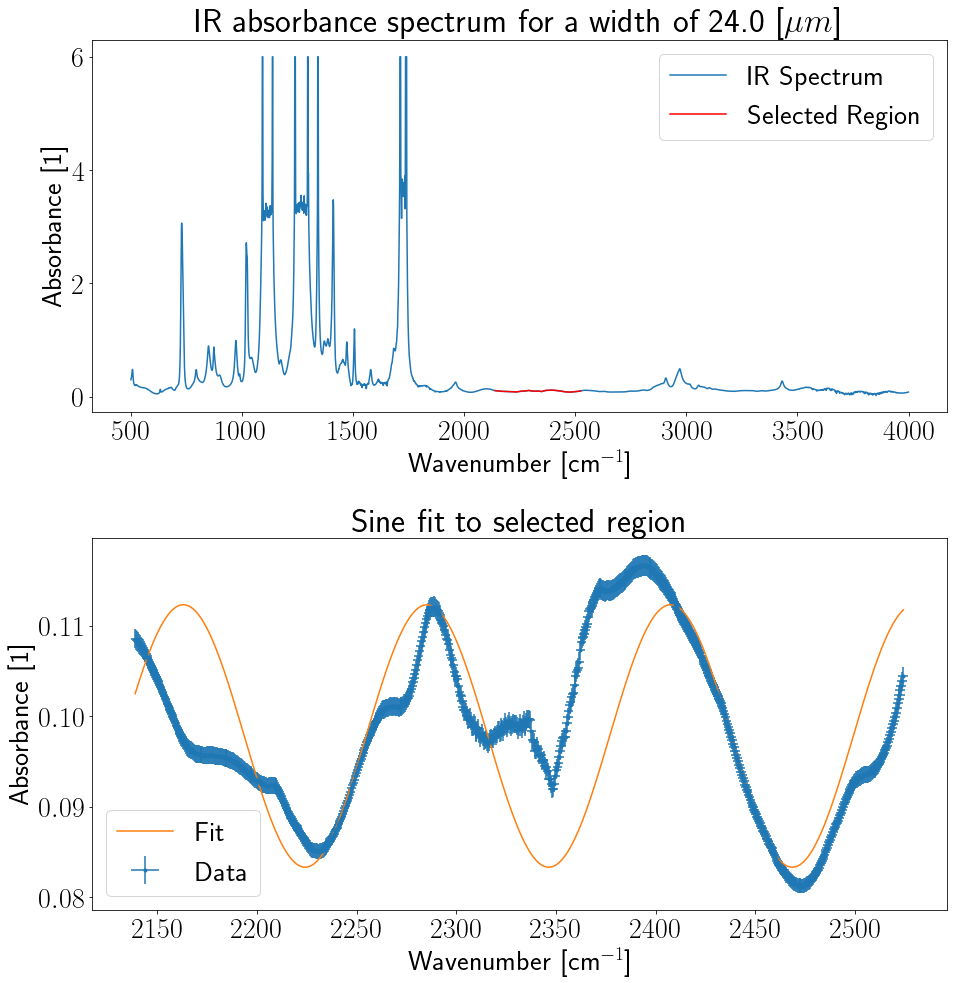

29_2 4


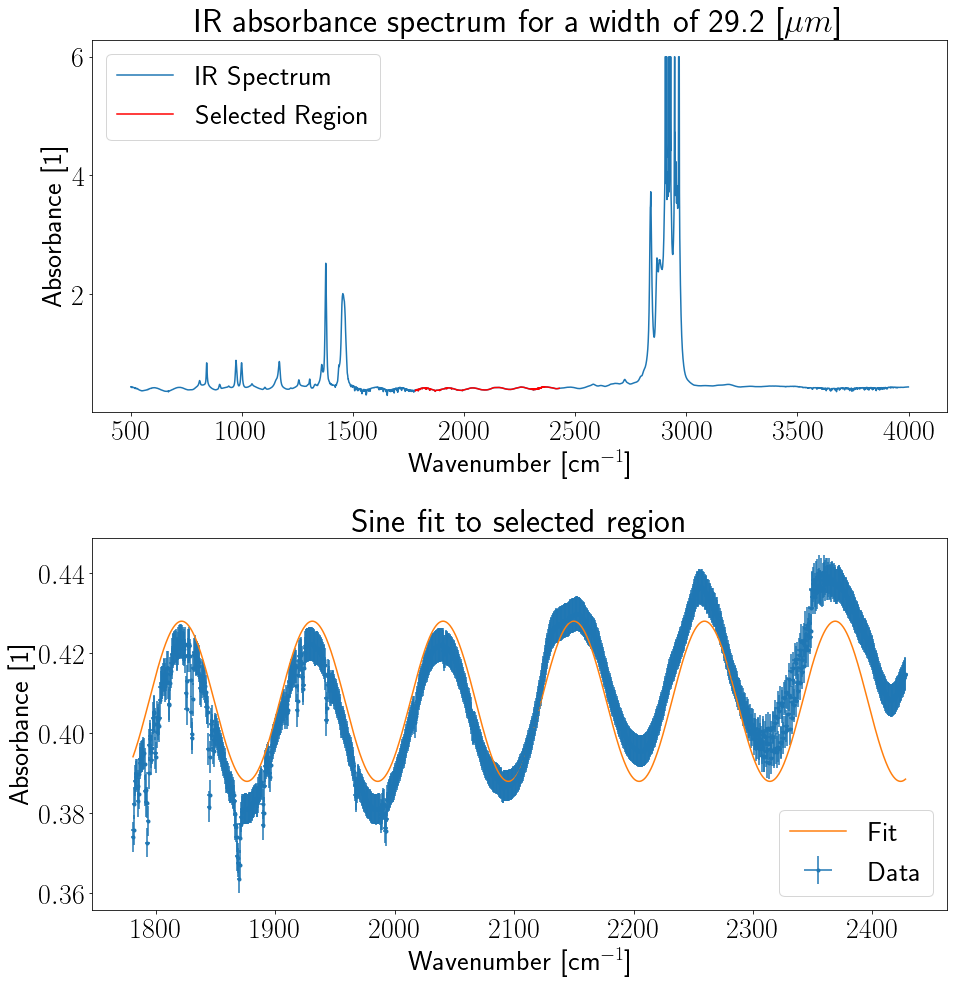

29_3 5


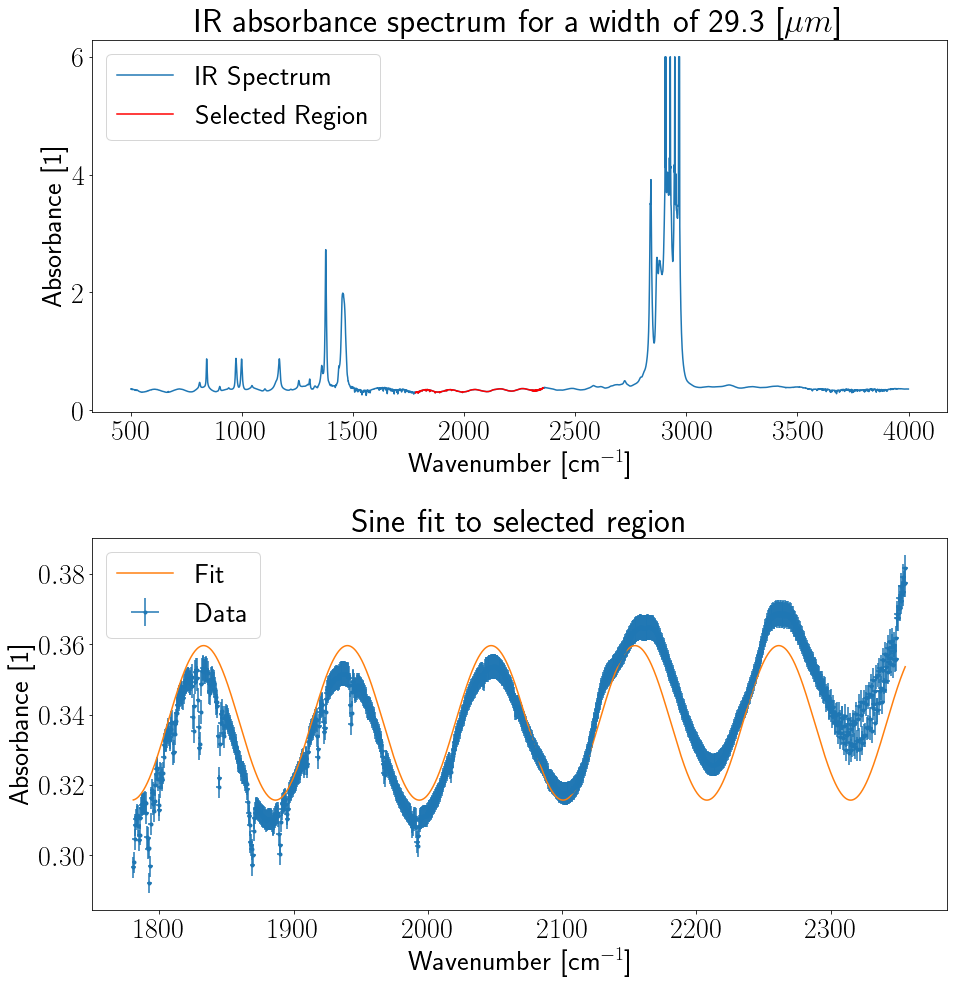

39_3 6


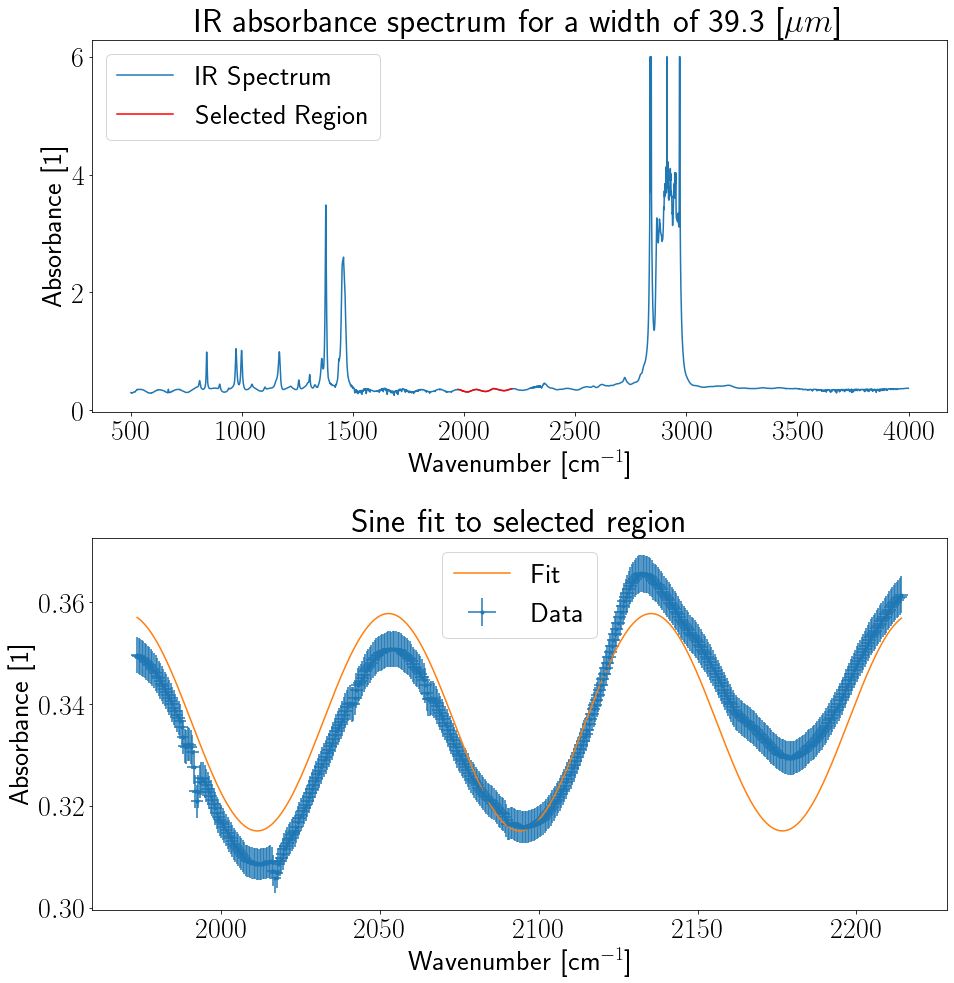

39_8 7


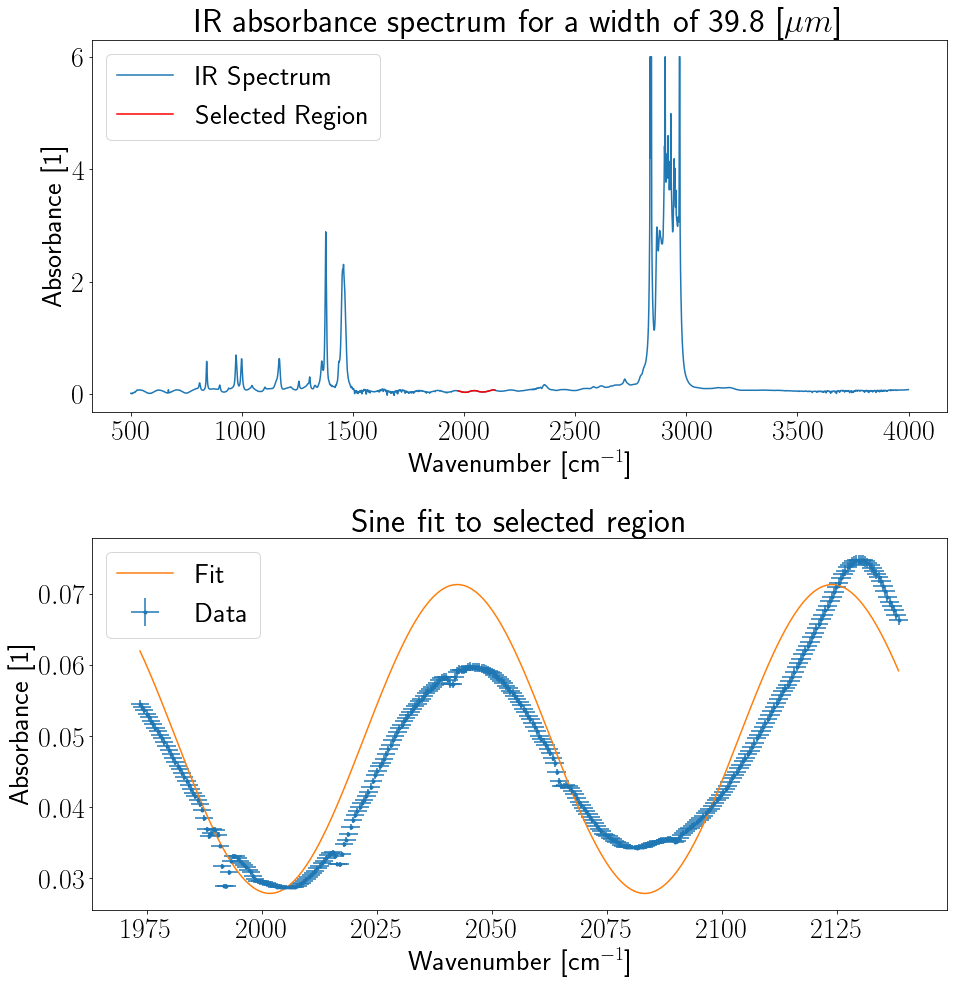

47_6 8


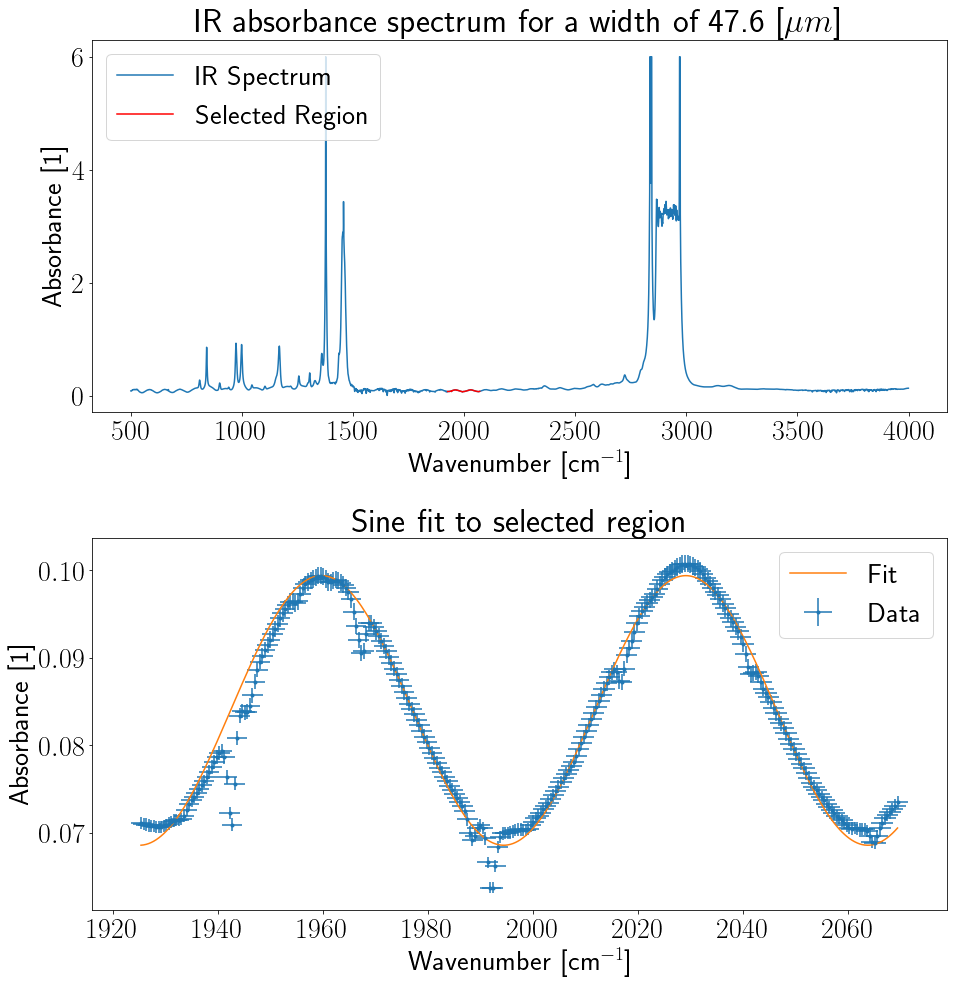

49_3 9


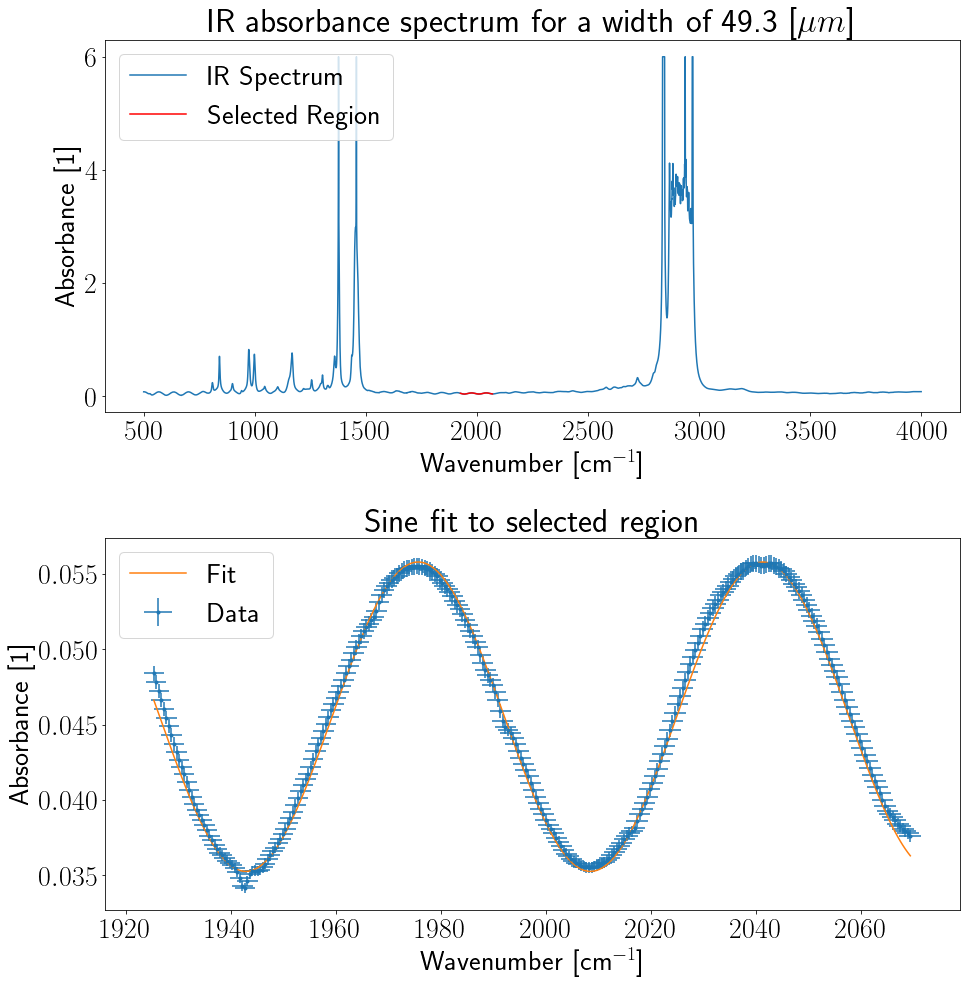

52_3 10


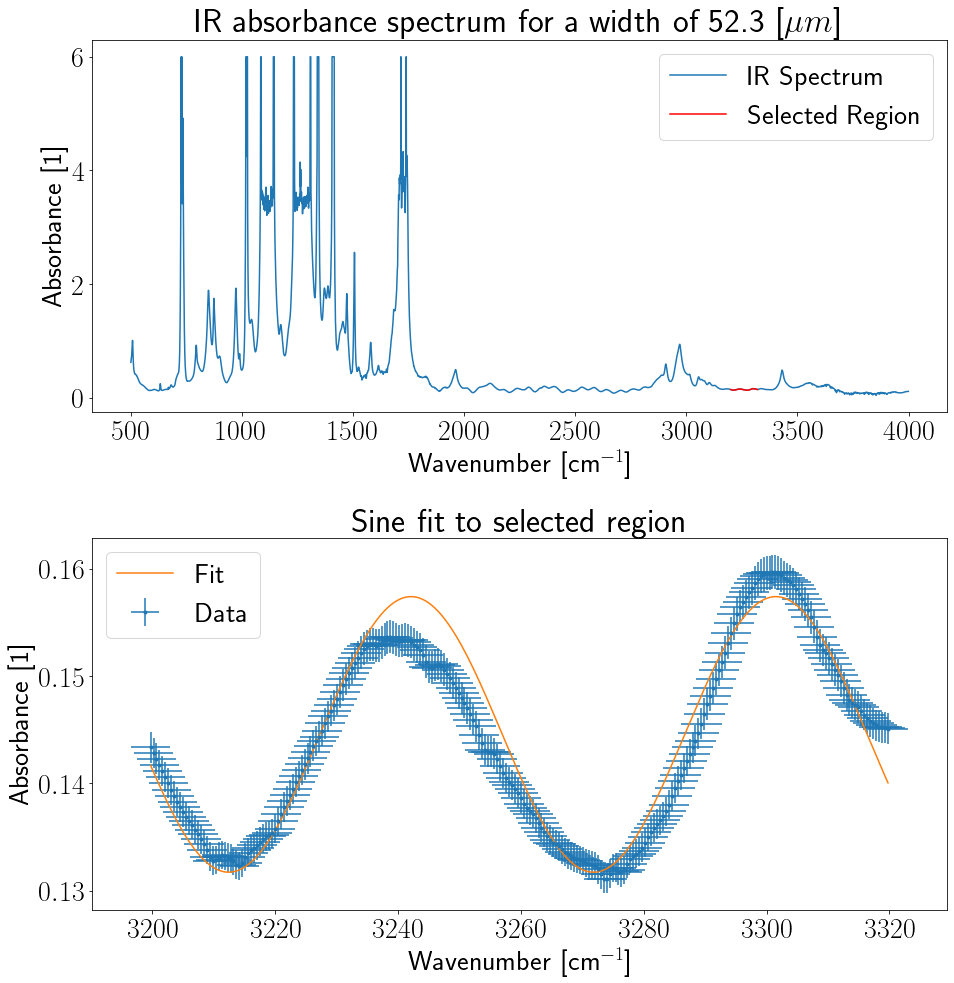

57_4 11


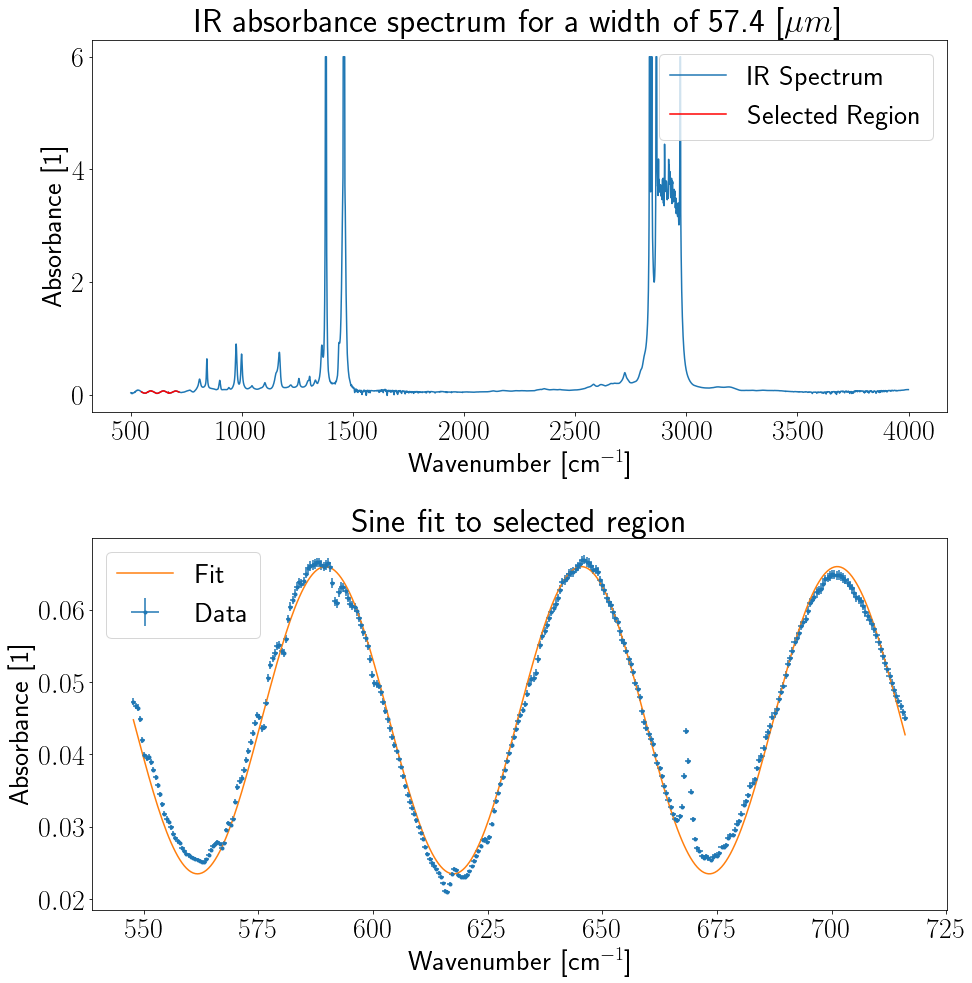

unknown cpp-c 12


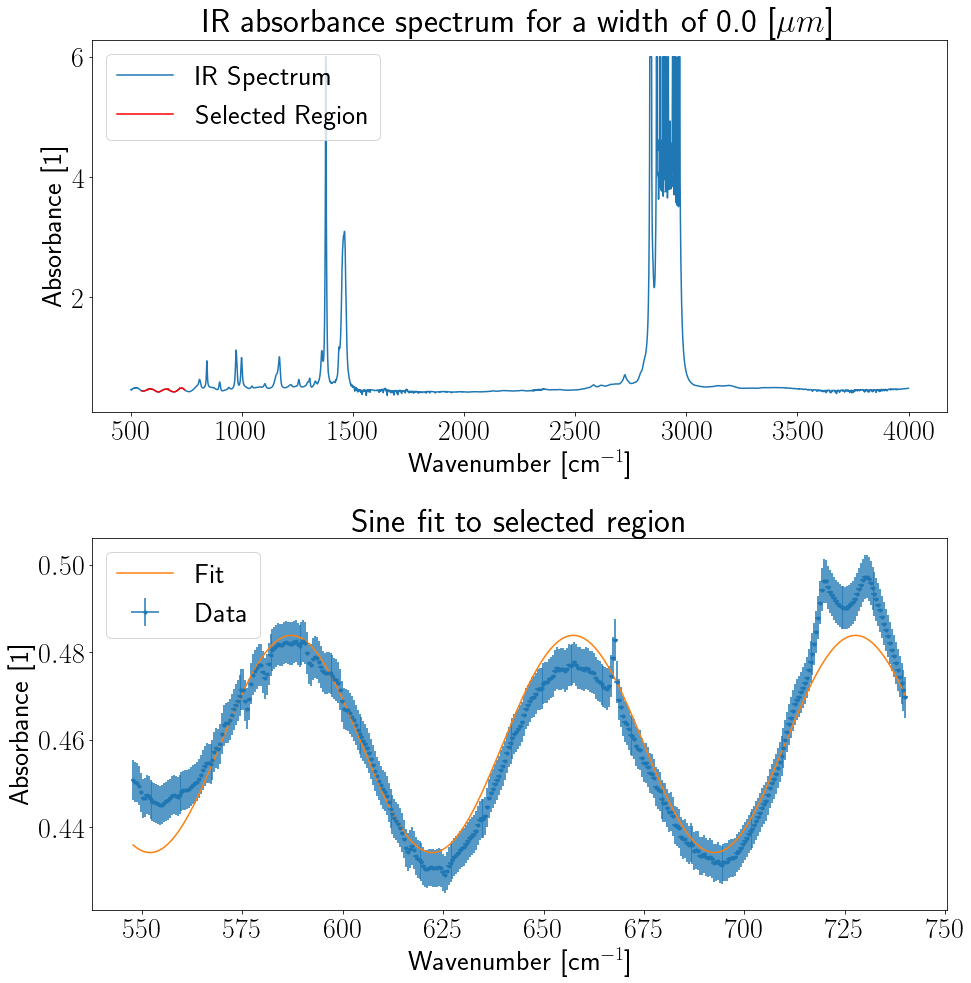

unknown E 13


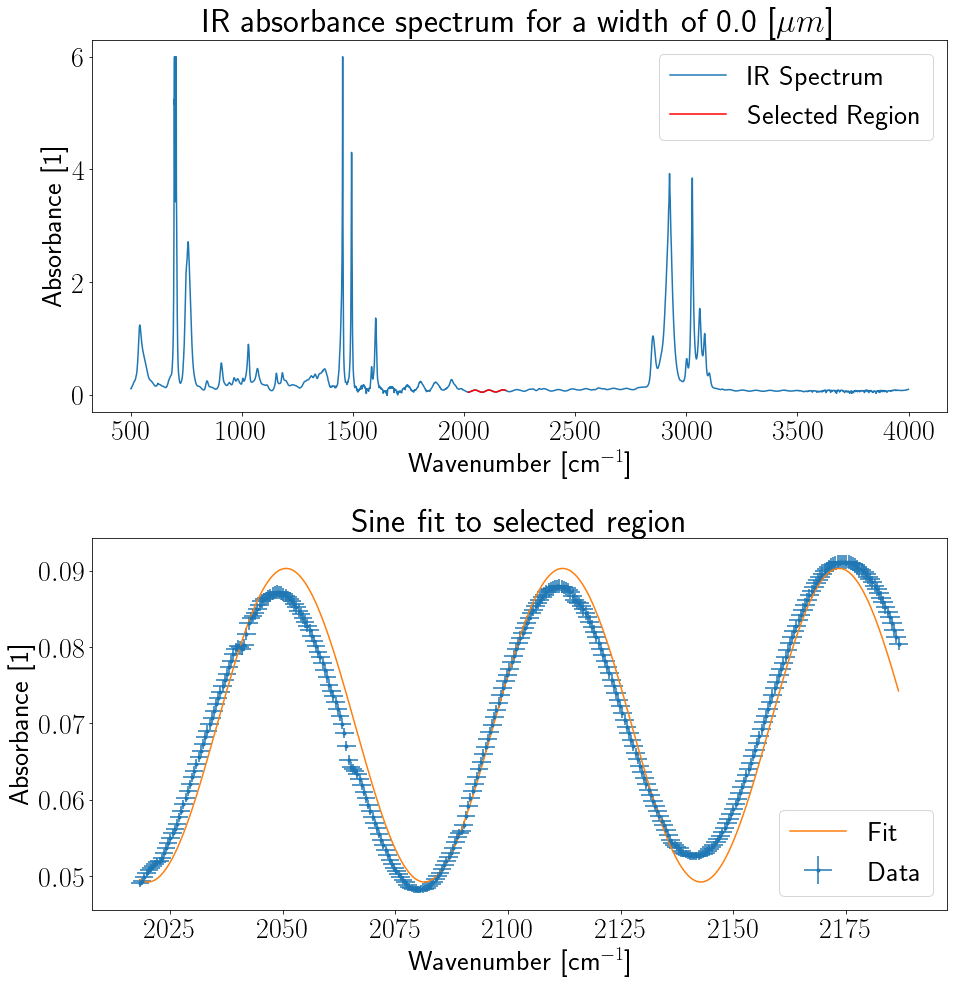

unknown 14


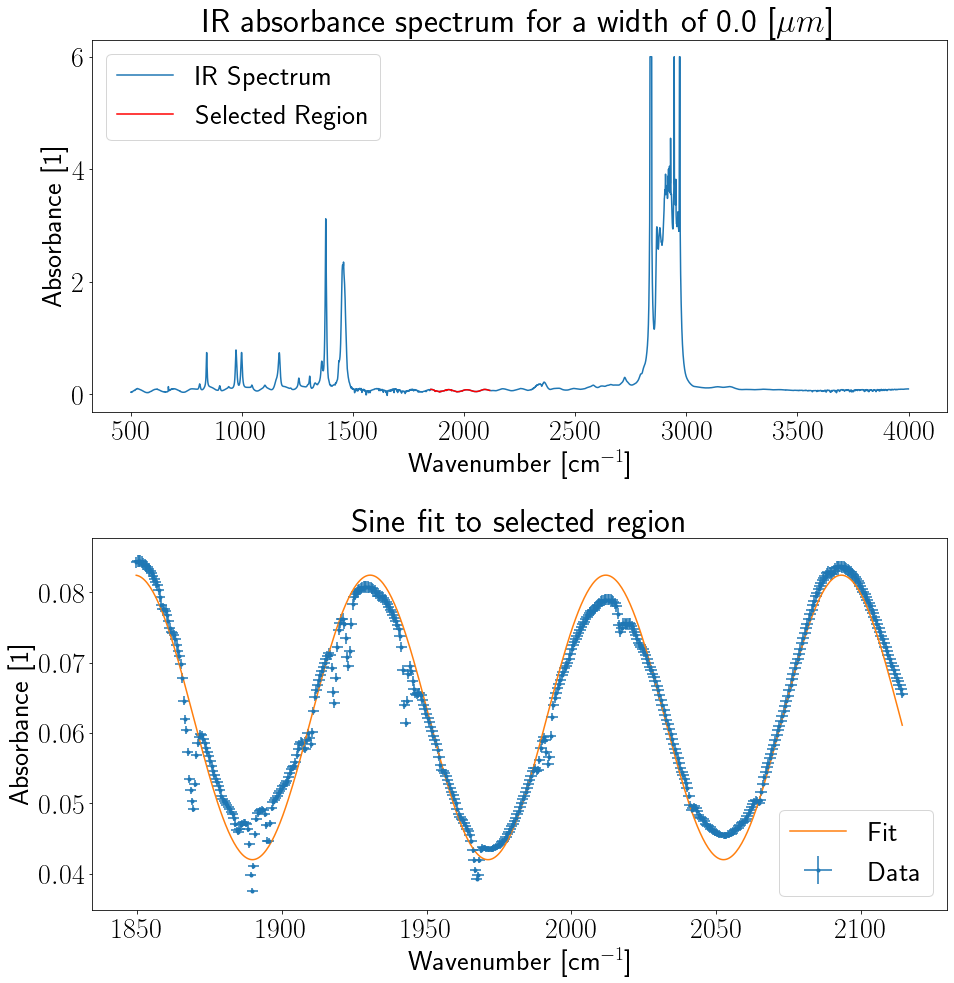

In [3]:
btm = [3257, 3257, 3257, 3400, 2657, 2657, 3057, 3057, 2957, 2957, 5600, 100, 100, 3150, 2800]
top = [4757, 4757, 4200, 4200, 4000, 3850, 3557, 3400, 3257, 3257, 5850, 450, 500, 3500, 3350]
#       0     1      2    3     4     5     6     7     8     9     10   11    12   13    14

# btm = [0]*len(eq_solids_x)
# top = [-1]*len(eq_solids_x)

plt.rcParams['figure.figsize'] = [15,15]
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 28, 'font.weight':'bold'})
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

a = np.zeros((len(files),2))
L = np.hstack((np.array([float(f.replace('_', '.')) for f in files[:-3]]),np.zeros(3)))

for i in range(len(eq_solids_x)):
    print(files[i], i)
#     x = eq_solids_x[i][btm[i]:top[i]]
    x = solids[i][0][btm[i]:top[i]]
#     y = eq_solids_y[i][btm[i]:top[i]]
    y = solids[i][1][btm[i]:top[i]]
    
#     peaks, _ = find_peaks(y, distance=115)
#     plt.plot(x[peaks], y[peaks], "xr")
#     plt.plot(x,y)
    
    
#     avg_dis = sum([x[peaks][i+1]-x[peaks][i] for i in range(len(x[peaks])-1)])/\
#                 len([x[peaks][i+1]-x[peaks][i] for i in range(len(x[peaks])-1)])
    
    fitt_data = eddington.FittingData(dict(x = x, dx = x * 0.001, y = y, dy = y*0.01))
    
#     guess = [(max(y)-min(y))/4.5,6/avg_dis,-30,7.76412e-2]
    
    result = eddington.fit(fitt_data, eddington.sin, a0=optimal[i])
#     eddington.plot_fitting(eddington.sin,fitt_data,dict(a = result.a),'Plot')
    
    fig, axs = plt.subplots(2)
    fig.tight_layout(pad=3.0)
    axs[0].set_title(f'IR absorbance spectrum for a width of {L[i]} [$\mu m$]')
    axs[0].plot(solids[i][0], solids[i][1])
    axs[0].plot(x,y,'r')
    axs[0].legend(('IR Spectrum','Selected Region'))
    axs[0].set_ylabel(r'Absorbance [1]')
    axs[0].set_xlabel(r'Wavenumber [$\text{cm}^{-1}$]')
    
    axs[1].set_title(f'Sine fit to selected region')
    axs[1].errorbar(x=fitt_data.x,xerr=fitt_data.xerr,y=fitt_data.y,yerr=fitt_data.yerr,fmt='.')
    axs[1].plot(x,eddington.sin(result.a,x))
    axs[1].legend(('Fit','Data'))
    axs[1].set_ylabel(r'Absorbance [1]')
    axs[1].set_xlabel(r'Wavenumber [$\text{cm}^{-1}$]')
    plt.savefig(os.path.join(path, f"Analysis/Solids - Plots/{files[i]}_Spec.png"))
    plt.show()
    
#     with open(os.path.join(path, f"Analysis/Solids - Plots/{files[i]}_fit.txt"), 'w') as f:
#         f.write(result.pretty_string)
    
    a[i] = np.array([result.a[1],result.aerr[1]])
    
#     x_fft = np.arange(0, 1000, step=1/(eq_solids_x[0][-1] * 2)) * 2 * np.pi
#     y_fft = np.abs(sci.fft(y).real)
#     plt.plot(x_fft[1:50],y_fft[1:50])
#     plt.savefig(os.path.join(path, f"Analysis/Solids - Plots/{files[i]}_Fourier.png"))
#     plt.show()


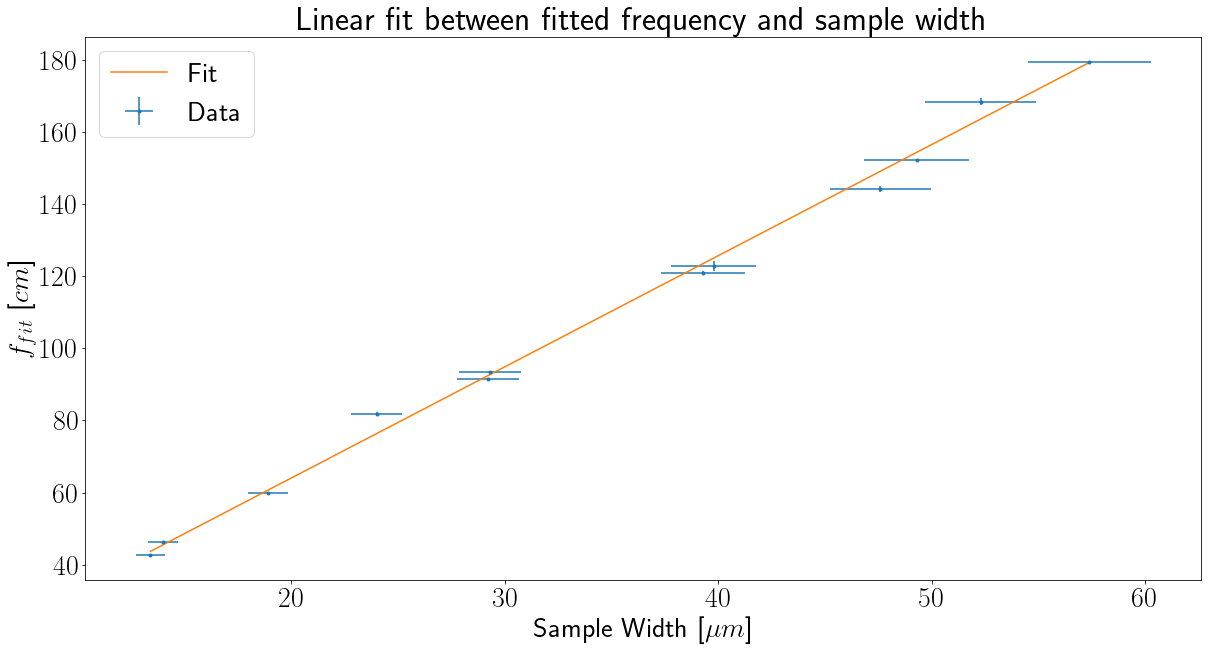

Results:

Initial parameters' values:
	1.0 1.0
Fitted parameters' values:
	a[0] = 2.438 ± 1.454 (59.65% error)
	a[1] = 3.07974 ± 0.06002 (1.949% error)
Fitted parameters covariance:
[[ 5.43  -0.198]
 [-0.198  0.009]]
Chi squared: 3.895
Degrees of freedom: 10
Chi squared reduced: 0.3895
P-probability: 0.9519



In [4]:
plt.rcParams['figure.figsize'] = [20,10]
lin_data = np.vstack((L[:-3],L[:-3] * 0.05,a[:-3].T * 1/(2*np.pi) * 10**4))
columns = ['d','Δd','a1','Δa1']
fitt_data = eddington.FittingData({columns[i]: lin_data[i] for i in range(len(lin_data))})
result = eddington.fit(fitt_data, eddington.linear)

plt.title('Linear fit between fitted frequency and sample width')
plt.errorbar(x=fitt_data.x,xerr=fitt_data.xerr,y=fitt_data.y,yerr=fitt_data.yerr,fmt='.')
plt.plot(fitt_data.x,eddington.linear(result.a,fitt_data.x))
plt.legend(('Fit','Data'))
plt.ylabel(r'$f_{fit}$ [$cm$]')
plt.xlabel(r'Sample Width [$\mu m$]')
plt.savefig(os.path.join(path, "Analysis/Solids - Plots/__linear_fit.png"))

with open(os.path.join(path, f"Analysis/Solids - Plots/__linear_result.txt"), 'w') as f:
        f.write(result.pretty_string)
plt.show()
print(result)

In [216]:
df = pd.DataFrame(lin_data.T, columns = columns)
df.set_index(df.columns[0],inplace=True)
df.to_excel(os.path.join(path,'Analysis/Solids - Plots/__lin_data.xlsx'))

In [19]:
print(f'n={result.a[1]/2:.5f}+-{result.aerr[1]/2:.5f}')

n=1.53987+-0.03001


In [41]:
print('The missing widths are:')
for i in range(1,4):
    freq = a[-i]* 1/(2*np.pi) * 10**4
    a0 = (result.a[0],result.aerr[0])
    a1 = (result.a[1],result.aerr[1])
    width = (freq[0]-a0[0])/a1[0]
    dW = np.sqrt((freq[1]/a1[0])**2 + ((freq[0]-a0[0])*a1[1]/(a1[0]**2))**2 + (a0[1]/a1[0])**2)
    print(f'{files[-i]} - frequency of {freq[0]:.3f} ± {freq[1]:.6f}' 
          f' and width of {width:.3f} ± {dW:.3f} ({dW/width*100:.2f}%)')

The missing widths are:
unknown - frequency of 122.845 ± 0.257602 and width of 39.097 ± 0.900 (2.30%)
unknown E - frequency of 163.023 ± 0.742739 and width of 52.142 ± 1.146 (2.20%)
unknown cpp-c - frequency of 142.240 ± 0.508991 and width of 45.394 ± 1.016 (2.24%)
